# **Introduction:**
 This notebook explores a Telecom customer churn dataset to identify factors contributing to customer attrition and build a predictive model for churn.
- **Description**: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
- **Columns**: Includes customer details, services used, contract terms, and churn status.
- **Purpose**: Used for customer churn analysis, segmentation, and retention strategies.
- **Applications**: Churn prediction, customer satisfaction analysis, and targeted marketing.
- **Analysis Tasks**: EDA, data preprocessing, ML model building, evaluation, and model deployment.
- **Relevance**: A practical dataset for real-world data science and customer relationship management scenarios.


## Let's start!

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# **Data Source:**
 The dataset used for this analysis is the Telecom Customer Churn dataset obtained from kaggle.


* **Data Loading**

In [2]:
#load data
telecom_cust = pd.read_csv('/content/Telco_Customer_Churn.csv')

#Data Exploration


In [3]:
#Data exploration
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Description**

The dataset contains information about Telco customers, including demographics, account details, services subscribed, and churn status.

Here's a description of each variable:

| Variable | Description | Data Type |
|---|---|---|
| customerID | Unique identifier for each customer | object |
| gender | Customer's gender (Male/Female) | object |
| SeniorCitizen | Whether the customer is a senior citizen (0/1) | int64 |
| Partner | Whether the customer has a partner (Yes/No) | object |
| Dependents | Whether the customer has dependents (Yes/No) | object |
| tenure | Number of months the customer has been with the company | int64 |
| PhoneService | Whether the customer has phone service (Yes/No) | object |
| MultipleLines | Whether the customer has multiple lines (Yes/No/No phone service) | object |
| InternetService | Customer's internet service provider (DSL/Fiber optic/No) | object |
| OnlineSecurity | Whether the customer has online security (Yes/No/No internet service) | object |
| OnlineBackup | Whether the customer has online backup (Yes/No/No internet service) | object |
| DeviceProtection | Whether the customer has device protection (Yes/No/No internet service) | object |
| TechSupport | Whether the customer has tech support (Yes/No/No internet service) | object |
| StreamingTV | Whether the customer has streaming TV (Yes/No/No internet service) | object |
| StreamingMovies | Whether the customer has streaming movies (Yes/No/No internet service) | object |
| Contract | The contract term of the customer (Month-to-month/One year/Two year) | object |
| PaperlessBilling | Whether the customer has paperless billing (Yes/No) | object |
| PaymentMethod | The customer's payment method (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)) | object |
| MonthlyCharges | The amount charged to the customer monthly | float64 |
| TotalCharges | The total amount charged to the customer | object |
| Churn | Whether the customer churned (Yes/No) | object |

**Notes:**

- `SeniorCitizen` is a binary variable where 0 represents No and 1 represents Yes.
- Variables related to internet services (e.g., `OnlineSecurity`, `OnlineBackup`, etc.) have "No internet service" as a possible value for customers who do not have internet service.
- The `TotalCharges` column is initially an object type and might need to be converted to a numeric type for analysis.
- The `Churn` variable is the target variable for this analysis.

In [4]:
#data information
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#statistics
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#features
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#Data Preprocessing



In [7]:
#convert total charges to a numerical data type
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [8]:
#checking missing values
telecom_cust.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
# Removing missing values
telecom_cust.dropna(inplace = True)

In [10]:
# Removing customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]

In [11]:
# Convert predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes',value=1, inplace=True)
df2['Churn'].replace(to_replace='No',value=0, inplace=True)

In [12]:
#Let's convert all the categorical variable into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


#Exploratory Data Analysis (EDA)



<Axes: >

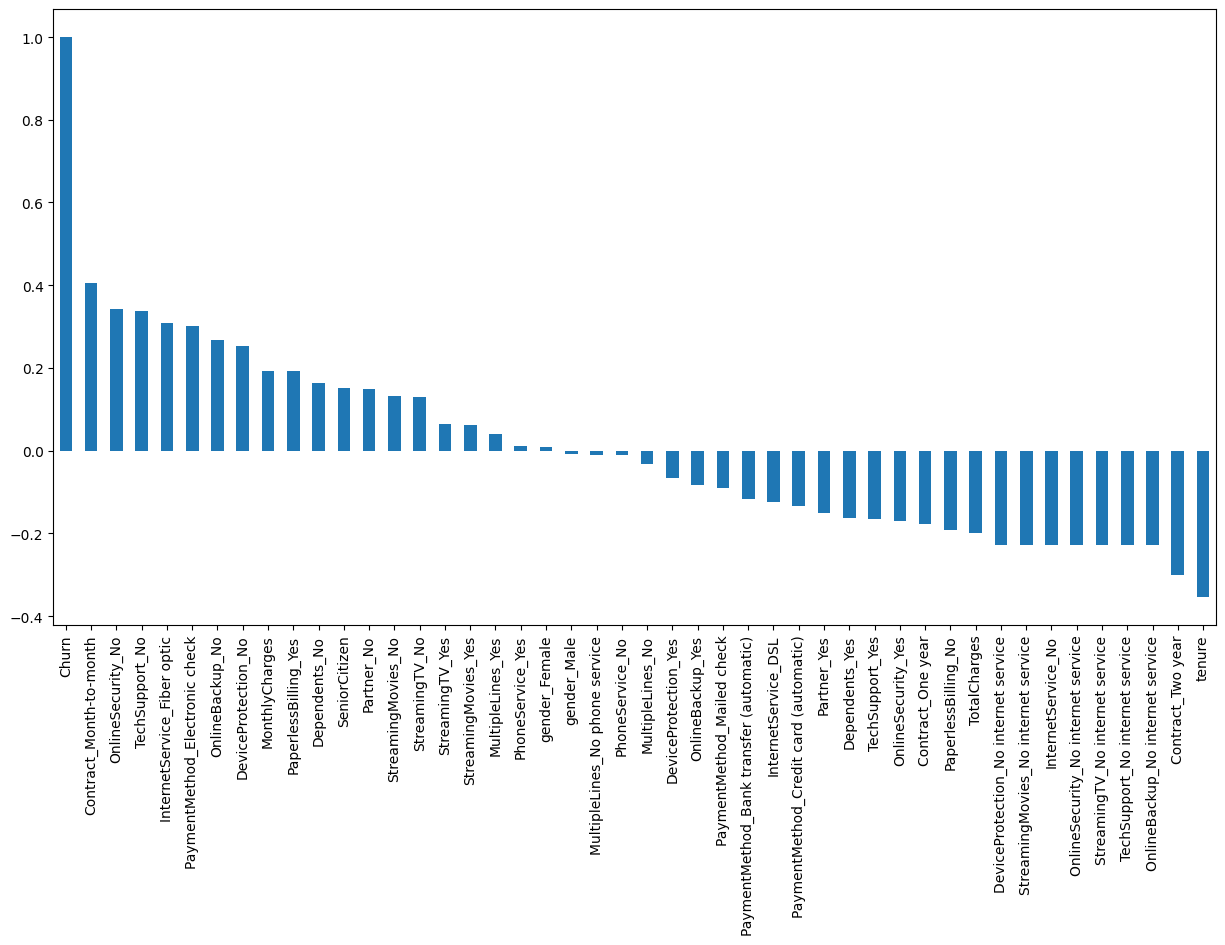

In [13]:
# Get Correlation of 'Churn' with other variables

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

##Insights:

* **Month-to-month contracts**: Customers on flexible, short-term plans are more likely to churn, lacking long-term commitment.

*   **Absence of online security and tech support**: Customers without these services tend to leave more often.


*   **Longer tenure and two-year contracts**: Customers who stay longer or sign up for longer terms show lower churn, indicating stronger loyalty.

*  **Value-added services**: Offering services like online security, streaming TV, online backup, and tech support—especially without requiring an internet connection—correlates with reduced churn.

*   To understand patterns



**A) Demographic**


*   In this section, we'll explore the demographic characteristics of the customers, including gender, age range (senior citizen status), partner status, and dependent status.






1.   **Gender Distribution**



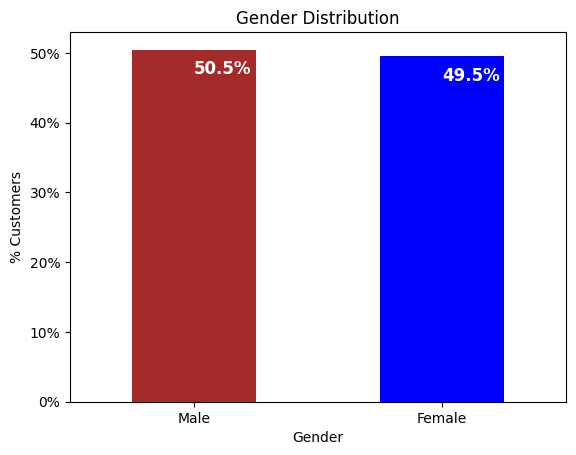

In [14]:
# Set colors for each gender
colors = ['brown', 'blue']

# Calculate the count of each gender
gender_counts = telecom_cust['gender'].value_counts()

# Create a bar plot showing the percentage of each gender
ax = (gender_counts * 100.0 / len(telecom_cust)).plot(
    kind='bar',  # Bar plot
    rot=0,       # No rotation for x-axis labels
    color=colors # Apply custom colors
)

# Format y-axis to show percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels for axes and title
ax.set_ylabel('% Customers')  # Y-axis label
ax.set_xlabel('Gender')       # X-axis label
ax.set_title('Gender Distribution')  # Plot title

# Iterate over bars to annotate with percentage values
total = gender_counts.sum()  # Get total count of customers
for bar, count in zip(ax.patches, gender_counts):
    # Calculate percentage for each gender
    percentage = count / total * 100

    # Add percentage text inside the bar
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
            f'{percentage:.1f}%',  # Display percentage with one decimal place
            fontsize=12,            # Set font size
            color='white',          # Set text color to white
            weight='bold'           # Make text bold
            )

# Display the plot
plt.show()



**Insight**:
*   Almost half are male & othe half are female.





2.   **Senior Citizens**



Text(0.5, 1.0, '% of Senior Citizens')

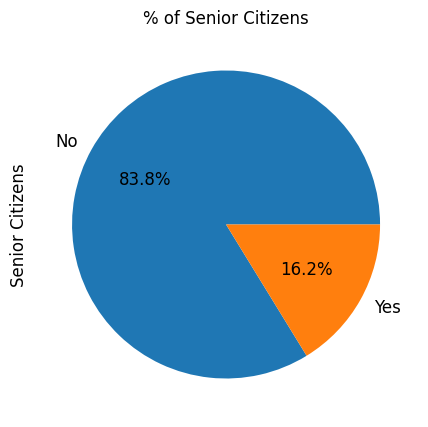

In [15]:
# Calculate the percentage distribution of Senior Citizens (1 = Yes, 0 = No)
ax = (telecom_cust['SeniorCitizen'].value_counts() * 100.0 / len(telecom_cust)) \
    .plot.pie(autopct='%.1f%%',  # Format percentage labels to 1 decimal place
              labels=['No', 'Yes'],  # Assign custom labels for the categories
              figsize=(5, 5),  # Set the figure size of the pie chart (5x5 inches)
              fontsize=12)  # Set font size for labels

# Set the y-axis label (although not used in pie charts, it helps for consistency)
ax.set_ylabel('Senior Citizens', fontsize=12)

# Set the title of the pie chart
ax.set_title('% of Senior Citizens', fontsize=12)



**Insight**:

*   Only 16% are senior citizen, that means most of the customer are younger people



3. **Dependents & Partner**

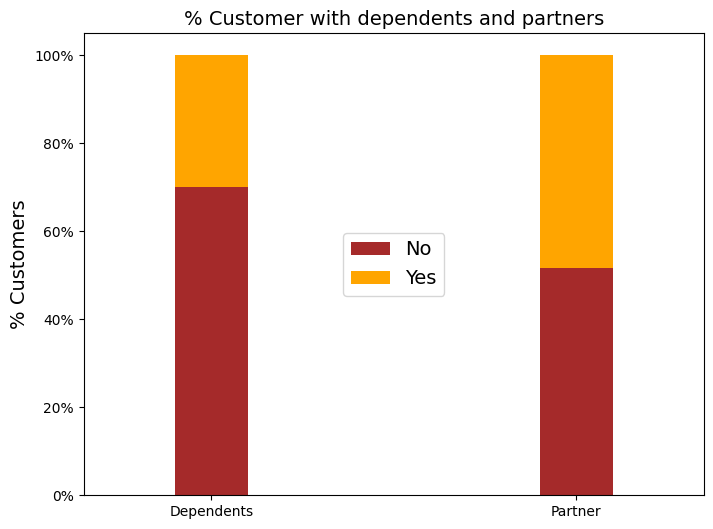

In [16]:
# Reshape the data to have 'Dependents' and 'Partner' in a single column
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Group by 'variable' and 'value', then count the occurrences
df3 = df2.groupby(['variable', 'value']).count().unstack()

# Convert the counts to percentages
df3 = df3 * 100 / len(telecom_cust)

# Set the colors for the categories (No = brown, Yes = orange)
colors = ['brown', 'orange']

# Plot a stacked bar chart
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors,
                                       figsize=(8, 6), rot=0, width=0.2)

# Format y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set y-axis label and plot title
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')  # Empty x-label
ax.set_title('% Customer with dependents and partners', size=14)

# Customize the legend position and font size
ax.legend(loc='center', prop={'size': 14})

# Annotate each bar with its percentage value
for p in ax.patches:
    width, height = p.get_width(), p.get_height()  # Get the width and height of each bar
    x, y = p.get_xy()  # Get the position of each bar
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 25 * width, p.get_y() + 0.4 * height),
                color='white', weight='bold', size=14)  # Add the percentage text

# Display the plot
plt.show()


*   **Insight**:

 About 50% of the customers have a partner, while only 30% of the total customers have dependents.

B) Customer Account Information



*   Tenure & contract



Text(0.5, 1.0, 'Distribution of Customer Tenure')

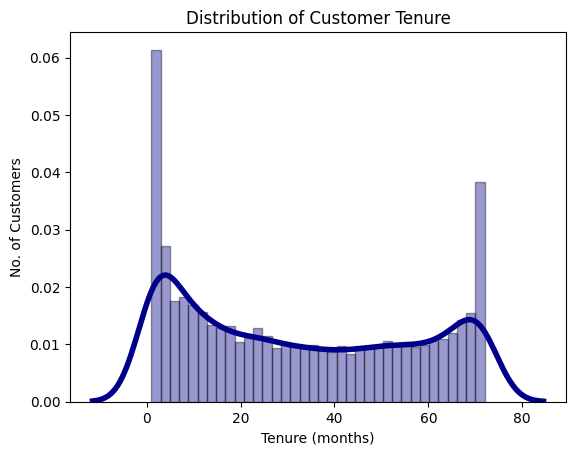

In [17]:
# Create a distribution plot for customer tenure (months)
ax = sns.distplot(telecom_cust['tenure'],
                  hist=True,  # Include histogram
                  kde=True,   # Include KDE curve
                  bins=int(180/5),  # Set the number of bins (180 months / 5 months per bin)
                  color='darkblue',  # Set the color for both the histogram and KDE curve
                  hist_kws={'edgecolor':'black'},  # Add black edge color to histogram bins
                  kde_kws={'linewidth':4})  # Set the linewidth of the KDE curve

# Set labels for the axes
ax.set_ylabel('No. of Customers')  # Y-axis label
ax.set_xlabel('Tenure (months)')   # X-axis label

# Set the title of the plot
ax.set_title('Distribution of Customer Tenure')  # Plot title


**Insights**:


*   **High initial peak**: Indicates a large proportion of new customers with short tenures.


*   **Gradual decline**: Suggests customer retention challenges as tenure increases.

*   **Secondary peak (around 70 months)**: Represents a segment of loyal, long-term customers.



*   **Right-skewed distribution**: Typical for tenure data, with a tail of longer tenures.




Text(0.5, 1.0, 'No. of Customers by Contract Type')

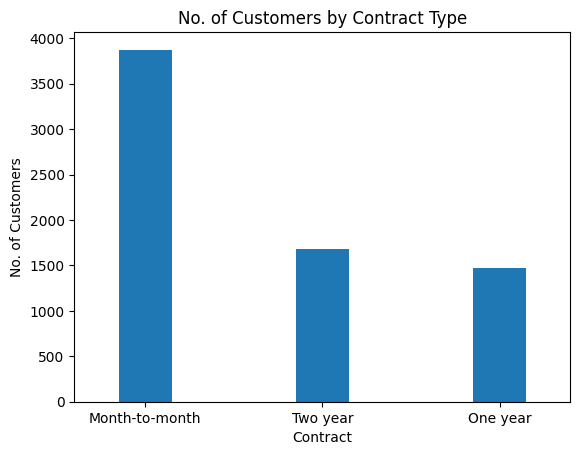

In [18]:
#Contracts
# Count the occurrences of each contract type and create a bar chart
ax = (telecom_cust['Contract'].value_counts().plot(kind='bar',
                                                   rot=0,  # Keep x-axis labels horizontal
                                                   width=0.3))  # Set width of the bars

# Set the y-axis label
ax.set_ylabel('No. of Customers')  # Y-axis label

# Set the title of the plot
ax.set_title('No. of Customers by Contract Type')  # Plot title


**Insight**:

*  Most of the customers are in the month to month contract while there are equal number of customers in the 1 year and 2 year contracts



**Subplots of Tenure vs. Contracts**

Text(0.5, 1.0, 'Two Year Contract')

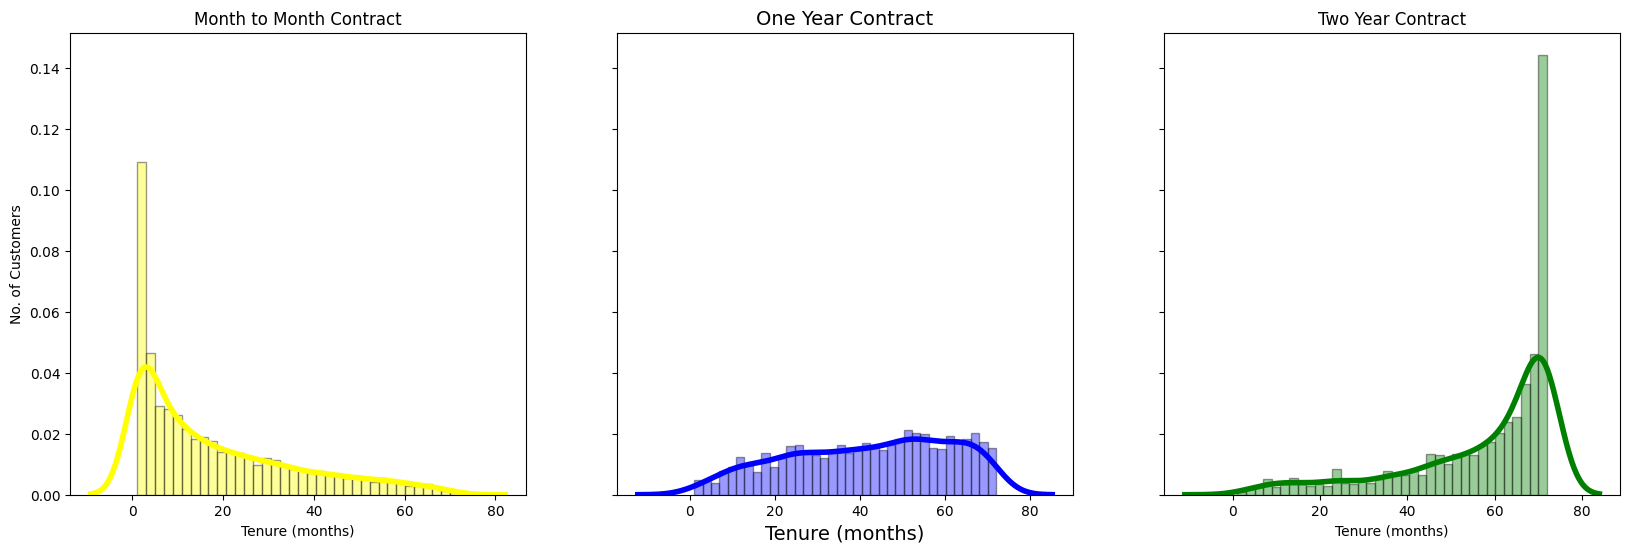

In [19]:
# Create 3 subplots side-by-side with shared y-axis for easy comparison
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Distribution plot for Month-to-Month contract customers
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
                  hist=True, kde=True,
                  bins=int(180/5),  # Number of bins (based on tenure range)
                  color='yellow',  # Set color to yellow
                  hist_kws={'edgecolor': 'black'},  # Black edges for histogram bars
                  kde_kws={'linewidth': 4},  # Thicker KDE line
                  ax=ax1)  # Plot in the first subplot
ax.set_ylabel('No. of Customers')  # Y-axis label
ax.set_xlabel('Tenure (months)')  # X-axis label
ax.set_title('Month to Month Contract')  # Plot title

# Distribution plot for One-Year contract customers
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],
                  hist=True, kde=True,
                  bins=int(180/5),
                  color='blue',  # Set color to blue
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax2)  # Plot in the second subplot
ax.set_xlabel('Tenure (months)', size=14)  # X-axis label with larger font size
ax.set_title('One Year Contract', size=14)  # Plot title with larger font size

# Distribution plot for Two-Year contract customers
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],
                  hist=True, kde=True,
                  bins=int(180/5),
                  color='green',  # Set color to green
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax3)  # Plot in the third subplot
ax.set_xlabel('Tenure (months)')  # X-axis label
ax.set_title('Two Year Contract')  # Plot title




**Insight**:

Interestingly most of the monthly contracts last for 1-2 months,

 while the 2 year contracts tend to last for about 70 months.

 This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

 C) Services Used by Customers

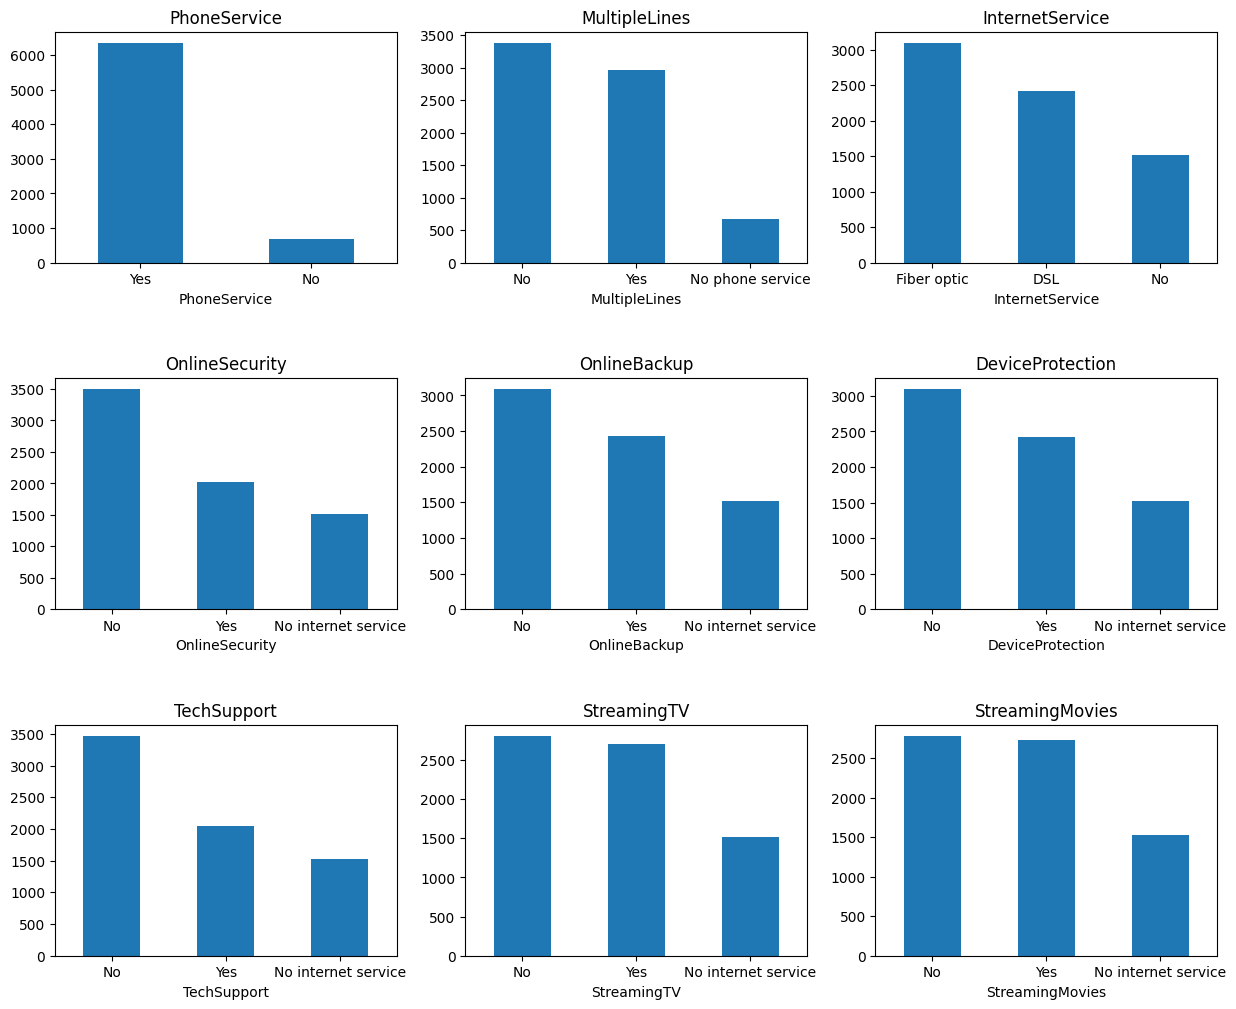

In [20]:
# List of services to visualize
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create 3x3 grid of subplots with a figure size of 15x12 inches
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Iterate over the services and create a bar plot for each
for i, item in enumerate(services):
    row, col = divmod(i, 3)  # Calculate row and column index for the subplot

    # Create a bar plot for the current service and place it in the corresponding subplot
    ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0)
    ax.set_title(item)  # Set the title of the plot

    # Rotate x-axis labels to be horizontal for better readability
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)

# Display the plot
plt.show()


**Findings:**
* Most customers have phone service, with a significant portion also having multiple lines.
* Fiber optic is the most popular internet service, followed by DSL.
* A considerable number of customers do not have online security, online backup, device protection, or tech support.
* Streaming TV and Streaming Movies are popular, but a portion of customers do not subscribe to them.

**Insights:**
* Bundling opportunities for internet services and add-on features.
* Customers value high-speed internet and entertainment options.
* Lack of online security and tech support could be potential churn factors.
* Targeted marketing based on service usage patterns.


### D) Relation Between Monthly & Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

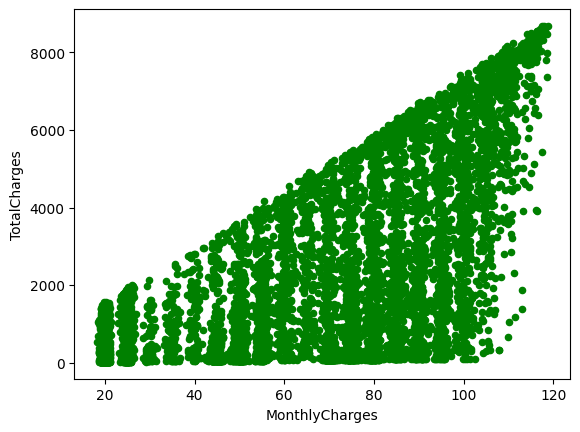

In [21]:
# Create a scatter plot for Monthly Charges vs Total Charges
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges',  # Set x-axis to Monthly Charges
                                                              y='TotalCharges',  # Set y-axis to Total Charges
                                                              color='green')  # Set point color to green


**Insight**:
Total charges increases as the monthly bill for a customer increases.

## E) Relationship between idependent variable (Churn) & other important variables

1) Churn rate with Customer

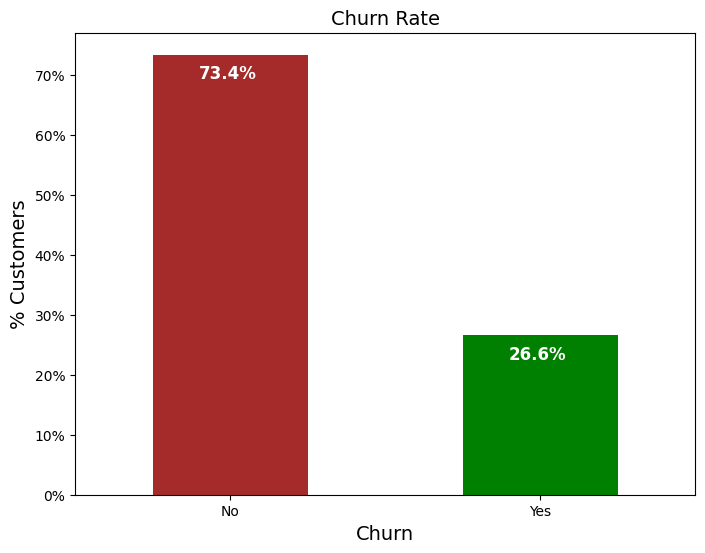

In [22]:
# Calculate churn percentages and create a bar plot
colors = ['brown', 'green']  # Set colors for bars (No Churn = brown, Churn = green)
ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(
    kind='bar',               # Create a bar plot
    stacked=False,            # Bars are not stacked
    rot=0,                    # Set x-axis labels horizontally
    color=colors,             # Set colors for each category (No Churn, Churn)
    figsize=(8, 6)            # Set figure size
)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels and title
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Create a list to collect the bar heights (totals)
totals = []
for i in ax.patches:
    totals.append(i.get_width())  # Get the width of each bar (representing customer count)

# Sum the totals for percentage calculation
total = sum(totals)

# Add percentage labels above the bars
for i in ax.patches:
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,  # Position of the label on each bar
            str(round((i.get_height() / total), 1)) + '%',  # Calculate percentage
            fontsize=12,                                   # Label font size
            color='white',                                  # Label color (white)
            weight='bold')                                  # Make the label bold


**Insight**:
 * The majority of customers are non-churners.
 * There is still a significant percentage of customers who churned.



2. **Churn rate by** ------> tenure, seniority, contract type, monthly charges and total charges
-

2.1. **Churn vs Tenure**

<Axes: xlabel='Churn', ylabel='tenure'>

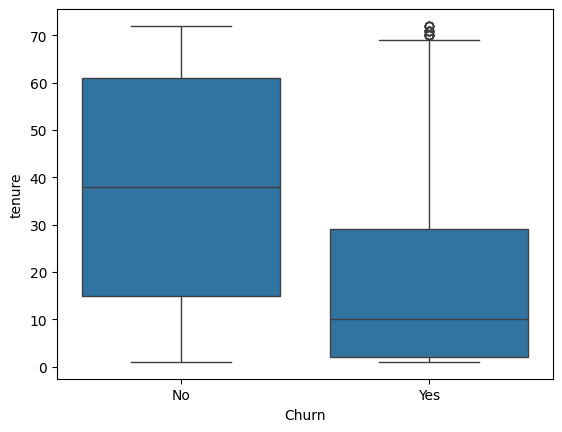

In [23]:
# Create a box plot to visualize tenure distribution by churn status
sns.boxplot(x=telecom_cust.Churn, y=telecom_cust.tenure)

**Insight**:
The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

2.2 **Churn by Contract Type**

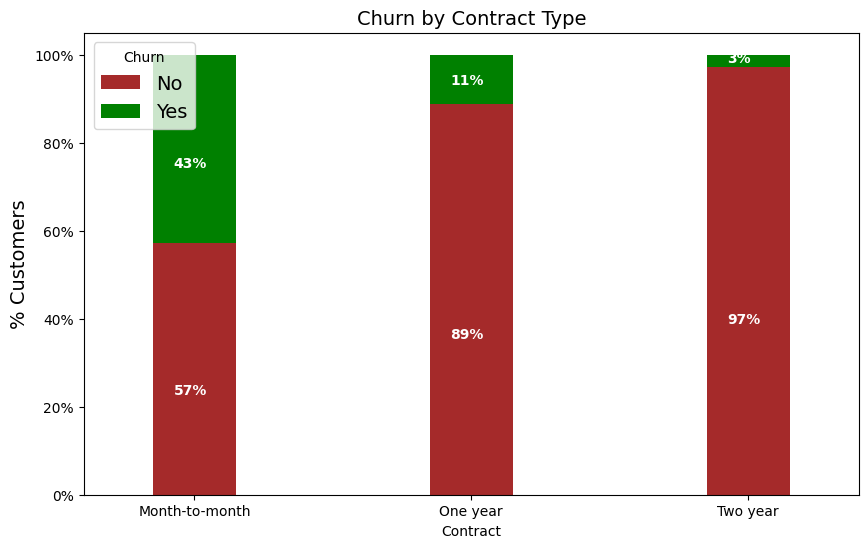

In [24]:
# Group data by Contract and Churn, and calculate churn percentages
contract_churn = telecom_cust.groupby(['Contract', 'Churn']).size().unstack()

# Calculate percentage of churn for each contract type
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(
    kind='bar',                # Create a bar plot
    stacked=True,              # Stack the bars to represent churn/no churn
    width=0.3,                 # Set bar width
    rot=0,                     # Keep x-axis labels horizontal
    figsize=(10, 6),           # Set figure size
    color=colors               # Set colors for the bars (e.g., churn vs non-churn)
)

# Format y-axis to display percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels and title
ax.legend(loc='best', prop={'size': 14}, title='Churn')   # Add legend with title
ax.set_ylabel('% Customers', size=14)                      # y-axis label
ax.set_title('Churn by Contract Type', size=14)             # plot title

# Add percentage labels to the stacked bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()           # Get bar width and height
    x, y = p.get_xy()                                       # Get position of the bar
    ax.annotate('{:.0f}%'.format(height),                    # Annotate the percentage on the bar
                (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',                               # Text color
                weight='bold',                               # Bold text
                size=10)                                     # Font size


**Insight**:
The customers who have a month to month contract have a very high churn rate.



   2.3 **Churn by Seniority**



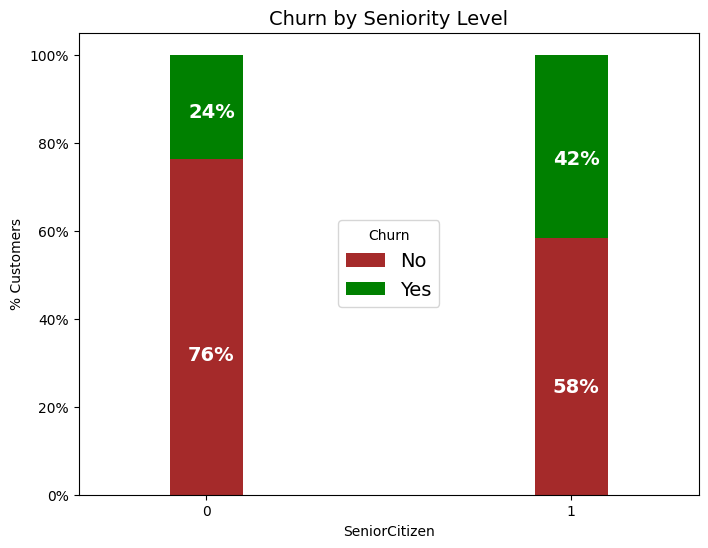

In [25]:
# Group data by SeniorCitizen and Churn, and calculate churn percentages
seniority_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate percentage of churn for each seniority level
ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(
    kind='bar',                # Create a bar plot
    stacked=True,              # Stack the bars to represent churn/no churn
    width=0.2,                 # Set bar width
    rot=0,                     # Keep x-axis labels horizontal
    figsize=(8, 6),            # Set figure size
    color=colors               # Set colors for the bars (e.g., churn vs non-churn)
)

# Format y-axis to display percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels and title
ax.legend(loc='center', prop={'size': 14}, title='Churn')   # Add legend with title
ax.set_ylabel('% Customers')                                 # y-axis label
ax.set_title('Churn by Seniority Level', size=14)             # plot title

# Add percentage labels to the stacked bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()           # Get bar width and height
    x, y = p.get_xy()                                       # Get position of the bar
    ax.annotate('{:.0f}%'.format(height),                    # Annotate the percentage on the bar
                (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',                               # Text color
                weight='bold',                               # Bold text
                size=14)                                     # Font size


**Insight**:
Senior Citizens have almost double the churn rate than younger population.

2.4 **Churn by Monthly Charges**

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

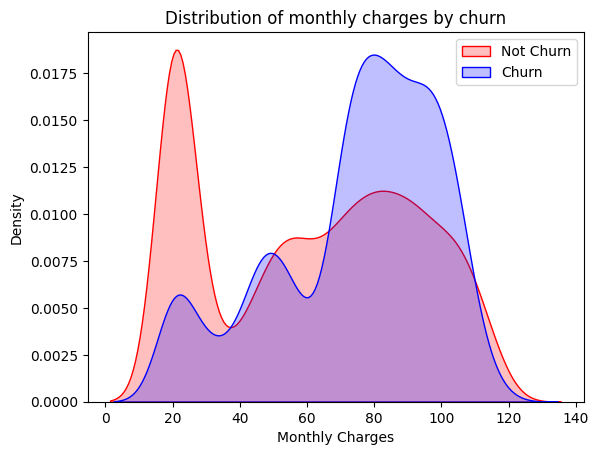

In [26]:
# KDE plot for customers who did not churn (Churn == 'No')
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust['Churn'] == 'No')],
                 color='Red', shade=True)

# KDE plot for customers who churned (Churn == 'Yes')
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust['Churn'] == 'Yes')],
                 color='Blue', shade=True)

# Add a legend to the plot
ax.legend(['Not Churn', 'Churn'], loc='upper right')

# Set the labels and title
ax.set_ylabel('Density')                   # Y-axis label
ax.set_xlabel('Monthly Charges')           # X-axis label
ax.set_title('Distribution of monthly charges by churn')  # Plot title


**Insight**:
Higher % of customers churn rate when the monthly charges are high.



   2.5 **Churn by Total Charges**



Text(0.5, 1.0, 'Distribution of total charges by churn')

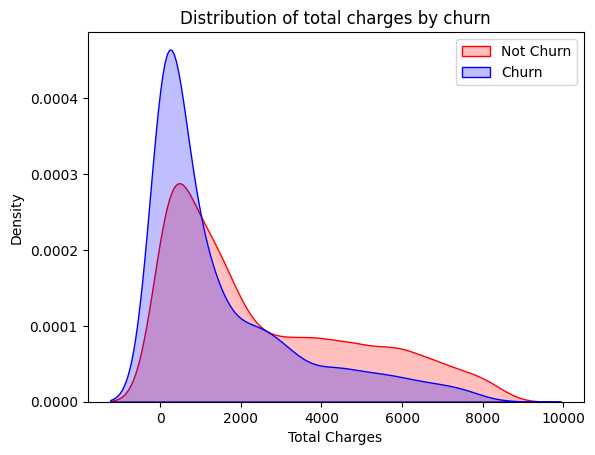

In [27]:
# KDE plot for customers who did not churn (Churn == 'No')
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust['Churn'] == 'No')],
                 color='Red', shade=True)

# Overlay KDE plot for customers who churned (Churn == 'Yes')
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust['Churn'] == 'Yes')],
                 ax=ax, color='Blue', shade=True)

# Add a legend to the plot
ax.legend(['Not Churn', 'Churn'], loc='upper right')

# Set the labels and title
ax.set_ylabel('Density')                   # Y-axis label
ax.set_xlabel('Total Charges')             # X-axis label
ax.set_title('Distribution of total charges by churn')  # Plot title


**Insight**:
There is higher churn rate when the total charges are lower.

## Step 4: Predictive modeling - ML Algorithms

#Developing and Comparing Machine Learning Models for Churn Prediction
1. **Data Preparation**
**Feature Scaling**:
For SVM, ADA Boost, and XG Boost, it's beneficial to scale numerical features using StandardScaler from sklearn.preprocessing to ensure features have similar ranges and improve model performance.


In [28]:
# Separate the target variable 'Churn' and feature matrix 'X'
y = df_dummies['Churn'].values  # Target variable
X = df_dummies.drop(columns = ['Churn'])  # Features without the target variable

# Scaling all the variables to a range of 0 to 1 using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Get the list of feature names
features = X.columns.values

# Initialize the scaler (MinMaxScaler) with the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the feature data and apply the transformation
scaler.fit(X)

# Transform the features and create a new DataFrame with scaled values
X = pd.DataFrame(scaler.transform(X))

# Rename the columns of the scaled DataFrame to match the original features
X.columns = features


In [29]:
from sklearn.model_selection import train_test_split

# Split data (features X, target y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Apply Logistic Regression


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if you get a convergence warning

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_cm)


Logistic Regression Accuracy: 0.7874911158493249
Logistic Regression Confusion Matrix:
 [[916 117]
 [182 192]]


Axes(0.125,0.11;0.775x0.77)


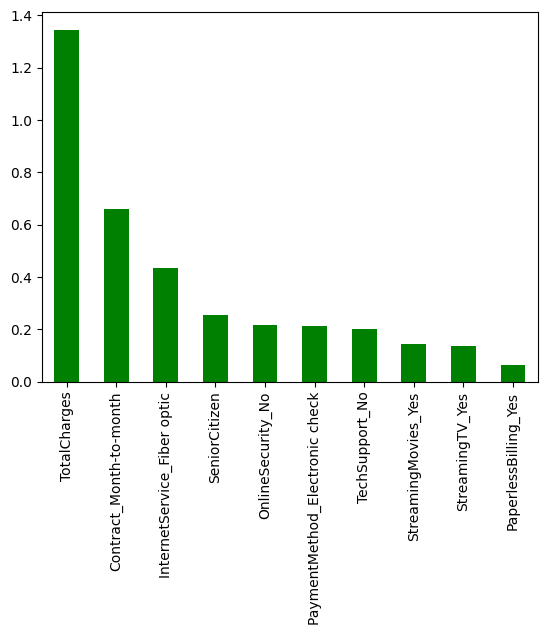

In [36]:
# To get the weights of all the variables

weights = pd.Series(logreg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


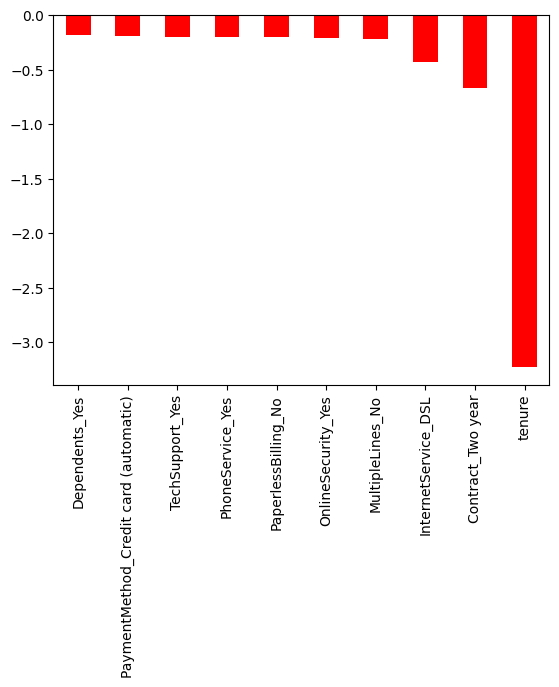

In [37]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))

# Observations
Some variable has positive & some negative relation with Predictive Variable (Churn)

- In EDA, having two month contracts reduces chance of Churn. That means it has negative relation with Churn.
- DSL internet also reduces the the probability of churn.
- total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates.

#Apply Random Forest


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_cm)


Random Forest Accuracy: 0.7775408670931059
Random Forest Confusion Matrix:
 [[921 112]
 [201 173]]


<Axes: >

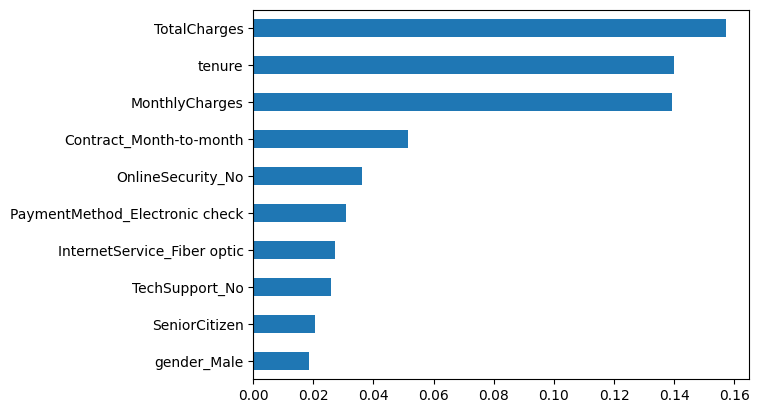

In [38]:
# Get the feature importance
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Observations
- Monthly contract, tenure and total charges are the most important predictor variables to predict churn.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

#Apply Support Vector Machine (SVM)


In [44]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear',probability=True, random_state=42)  # You can experiment with 'linear', 'rbf', etc.

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", svm_accuracy)
print("SVM Confusion Matrix:\n", svm_cm)


SVM Accuracy: 0.7938877043354655
SVM Confusion Matrix:
 [[917 116]
 [174 200]]


#Apply XGBoost


In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the XGBoost model
xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xg_model.fit(X_train, y_train)

# Make predictions
y_pred_xg = xg_model.predict(X_test)

# Evaluate the model
xg_accuracy = accuracy_score(y_test, y_pred_xg)
xg_cm = confusion_matrix(y_test, y_pred_xg)

print("XGBoost Accuracy:", xg_accuracy)
print("XGBoost Confusion Matrix:\n", xg_cm)


XGBoost Accuracy: 0.7654584221748401
XGBoost Confusion Matrix:
 [[895 138]
 [192 182]]


### Observation on Hyperparameter Tuning

* **Baseline Performance:** The baseline  models (e.g.,logistic regression) achieved a respectable AUC score of ~0.85.
* **Limited Data:**  The dataset is relatively small, increasing the risk of overfitting with extensive hyperparameter tuning.
* **Tuning Impact:** Initial attempts at tuning did not yield significant improvements and sometimes resulted in decreased performance.


#Comparing the Models


                 Model  Accuracy
0  Logistic Regression  0.787491
1        Random Forest  0.777541
2                  SVM  0.793888
3              XGBoost  0.765458


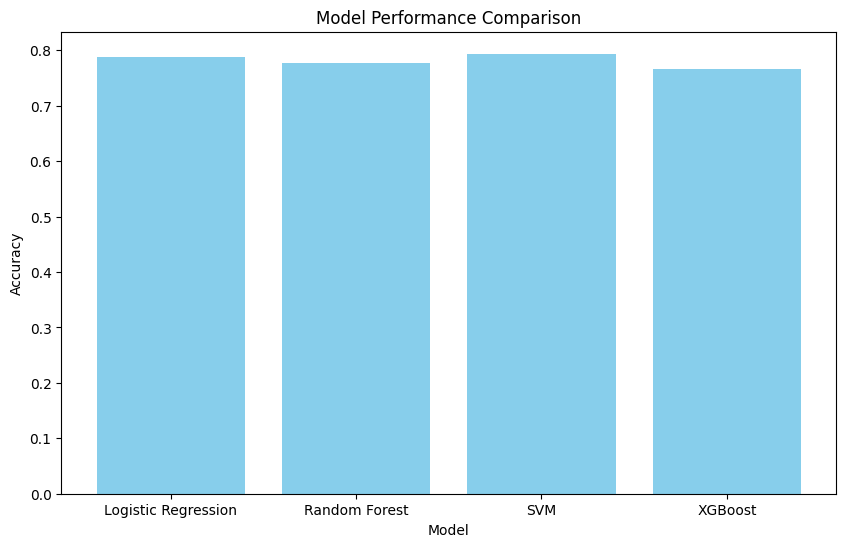

In [45]:
import matplotlib.pyplot as plt

# Create a dictionary of model results
model_results = {
    'Logistic Regression': logreg_accuracy,
    'Random Forest': rf_accuracy,
    'SVM': svm_accuracy,
    'XGBoost': xg_accuracy
}

# Convert dictionary to DataFrame for easy comparison
results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])
print(results_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()


Insight:

- Logistic Regression, Random Forest, SVM, and XGBoost all achieved relatively similar accuracy scores, around 80%.
- SVM has the highest accuracy among the four models, although the difference is marginal.



#AUC-ROC Curve


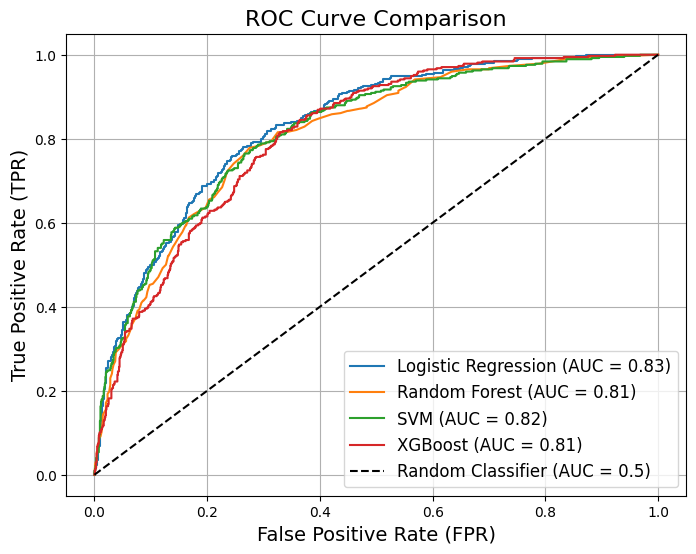

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for all models
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    # Iterate through each model
    for name, model in models.items():
        # Get predicted probabilities for the positive class (Churn = 1)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)  # No need for encoding as y_test is already binary
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot the diagonal (random classifier)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

    # Customize plot
    plt.title('ROC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

# Dictionary of trained models
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xg_model
}

# Plot ROC curve for all models
plot_roc_curve(models, X_test, y_test)


**Insight**:
- **All four models (Logistic Regression, Random Forest, SVM, and XGBoost) exhibit AUC scores significantly higher than 0.5**, indicating their predictive power is better than a random classifier.

- **Random Forest and XGBoost have AUC scores slightly below 0.85**, suggesting good discrimination ability but with room for improvement.

- **Logistic regression and SVM demonstrate the highest AUC scores, close to 0.85**, implying better performance in distinguishing between churn and non-churn customers compared to Random Forest and XGBoost
.



# Conclusions:
- **Customer churn is heavily influenced by contract type, tenure, demographics, services used, and charges**. Shorter tenures, month-to-month contracts, higher monthly charges, and a lack of value-added services increase churn risk.
- **Predictive models like Logistic Regression and SVM showed good performance (around 80% accuracy and 0.85 AUC) in identifying potential churners**. This allows for targeted interventions.


#Marketing Strategies:


1.   **Personalization & Retention**:

- Proactively engage at-risk customers with personalized offers and loyalty rewards.
- Design win-back campaigns for churned customers, addressing their reasons for leaving.

2.   **Value-Driven Bundling**:

- Offer strategic bundles with discounted rates, addressing specific customer needs.
- Introduce flexible bundle options to enhance perceived value and satisfaction.

3. **Elevated Customer Experience**:

- Implement proactive support and personalized communication across all touchpoints.
- Ensure seamless omnichannel service for consistent and efficient support.

4. **Data-Driven Optimization**:

- Continuously monitor key metrics and make data-driven adjustments to marketing strategies.
- Conduct A/B testing to optimize campaigns and maximize impact.
- Analyze competitors and market trends to maintain a competitive edge.




